import pandas as pd

import pandas as pd

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
                'acceleration', 'model_year', 'origin', 'car_name']

file_path = 'auto-mpg.txt'  

df = pd.read_csv(file_path, header=None, names=column_names, delim_whitespace=True)

print(df.shape)
missing_values_counts = df.isnull().sum()
print(missing_values_counts)
missing_values_count2 = df['horsepower'].eq('?').sum()
print(missing_values_count2)

df

In [82]:
import urllib.request
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
column_names = [
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
    'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
    'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
    'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
    'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]
file_path = 'imports-85.txt'  

df = pd.read_csv(file_path, header=None, names=column_names)

#print(df.shape)
#missing_values_count2 = df['horsepower'].eq('?').sum()
#print(missing_values_count2)
df.head(3).transpose()



,0,1,2
symboling,3,3,1
normalized-losses,?,?,?
make,alfa-romero,alfa-romero,alfa-romero
fuel-type,gas,gas,gas
aspiration,std,std,std
num-of-doors,two,two,two
body-style,convertible,convertible,hatchback
drive-wheels,rwd,rwd,rwd
engine-location,front,front,front
wheel-base,88.6,88.6,94.5


1.Поборотися із зниклими даними.

In [65]:

question_marks_count = (df == '?').sum()
print("Кількість '?' у кожній колонці:")
print(question_marks_count)



Кількість '?' у кожній колонці:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


In [103]:
#df = df.drop("normalized-losses", axis=1)
df= df.drop(df[df.isin(['?']).any(axis=1)].index)
question_marks_count = (df == '?').sum()
df["price"] = df["price"].astype(int)
df["horsepower"] = df["horsepower"].astype(int)


print("Кількість '?' у кожній колонці:")
print(question_marks_count)
df.dtypes

Кількість '?' у кожній колонці:
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower             int64
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

2.Пронормувати вибраний датасет або стандартизувати його

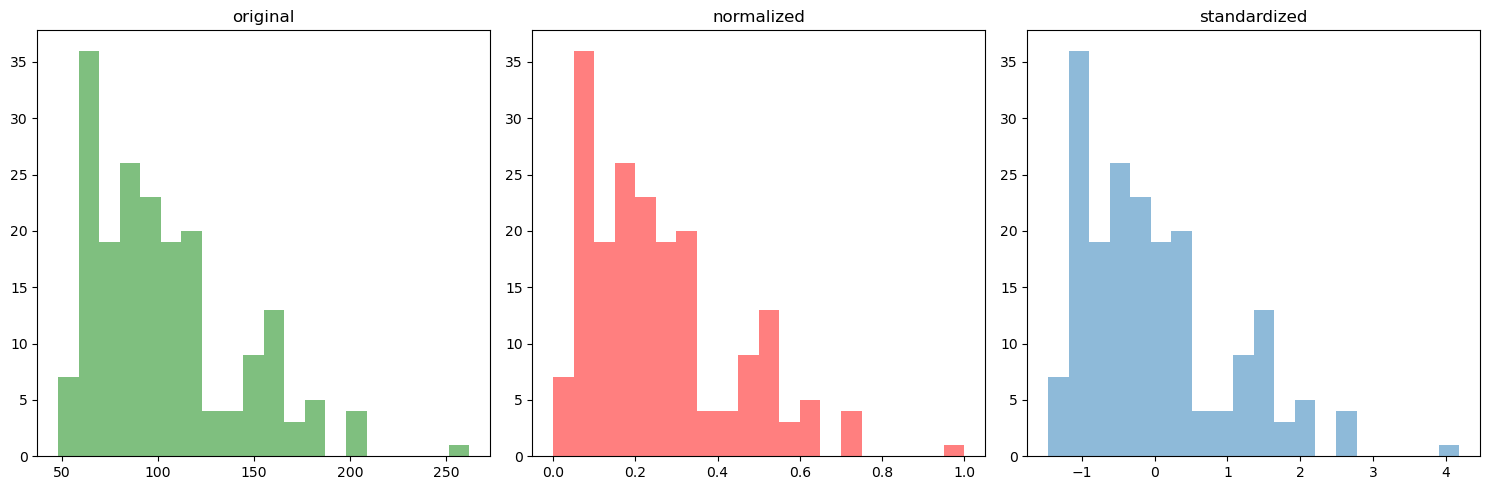

In [110]:
def normalize_data(data):
    min_val = min(data)
    max_val = max(data)
    norm_data = (data - min_val)/(max_val-min_val)
    return norm_data

def standardize_data(data):
    mean_val = np.mean(data)
    std_val = np.std(data)
    std_data = (data-mean_val)/std_val
    return std_data

normalized = normalize_data(df["horsepower"])
standardized = standardize_data(df["horsepower"])

#original
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.hist(df["horsepower"],bins = 20,alpha=0.5, color="green")
plt.title("original")

#normalized
plt.subplot(1, 3, 2)
plt.hist(normalized,bins = 20,alpha=0.5, color="red")
plt.title("normalized")

#standardized
plt.subplot(1, 3, 3)
plt.hist(standardized,bins = 20,alpha=0.5)
plt.title("standardized")

plt.tight_layout()
plt.show()

